# <font color='red'>**In this project we'll Try to biuld a Deep Learning System. Which can predict category of the news by just  taking Headline of news. **</font>

<font color='red'>**This project is specifically focuses on the Bert Model, Showing How can we use Bert and how powerfull Bert Model is. **</font>

In [1]:
# importing supporting Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.utils import shuffle
import random
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sys
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import pickle
import datetime
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
import os
import datetime
from sklearn.metrics import roc_auc_score
import datetime
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
import os
import datetime
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import load_model
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### <font color='green'>** Introduction of the Dataset we have. **</font>

The dataset we will use here, I get it from machine Learning Reporsitiry of University Of california. The UCI Machine Learning Repository is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms. Please go through the bellow link To know more about the dataset :
        https://archive.ics.uci.edu/ml/datasets/News+Aggregator

Just for the completeness it has bellow given columns :

        1- ID - Numeric ID
        2- TITLE - News title or Headline
        3- URL - Url
        4- PUBLISHER - Publisher name
        5- CATEGORY - News category (b = business, t = science and technology, e = entertainment, m = health)
        6- STORY - Alphanumeric ID of the cluster that includes news about the same story
        7- HOSTNAME - Url hostname
        8- TIMESTAMP - Approximate time the news was published, as the number of milliseconds since the epoch 00:00:00 GMT,    January 1,1970

<font color='purple'>**Reading the Initial Dataset. **</font>

In [ ]:
data = pd.read_csv(r"C:\Users\AC\Downloads\Bert New project\Data\uci-news-aggregator.csv")
# Mapping Categories to Their full Name
data["CATEGORY"] = data["CATEGORY"].map({"b":"business" , "t" :"science and technology","e":"entertainment","m":"health"})
print("We Have total",len(data),"points in Our Initial Dataset.")
print("-"*60)
data.head(3)

We Have total 422419 points in Our Initial Dataset.
------------------------------------------------------------


,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,business,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,business,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,business,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550


In [ ]:
# Printing one Sample Point
index_of_random_point = random.randint(0, len(data)-1)
print("One Sample Data point is bellow :")
print("-"*60)
print("HEADLINE  is :",data.iloc[index_of_random_point]["TITLE"])
print("Category in which headline bellongs to :",str(data.iloc[index_of_random_point]["CATEGORY"]))

One Sample Data point is bellow :
------------------------------------------------------------
HEADLINE  is : What Do You Do When Your Son Says He Met Jesus? Surprisingly, Not Much.
Category in which headline bellongs to : entertainment


In [ ]:
# printing Some basic Info about Dataset
print("Some basic Info about the dataset we have :")
print("-"*60)
data.info()

Some basic Info about the dataset we have :
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422419 entries, 0 to 422418
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ID         422419 non-null  int64 
 1   TITLE      422419 non-null  object
 2   URL        422419 non-null  object
 3   PUBLISHER  422417 non-null  object
 4   CATEGORY   422419 non-null  object
 5   STORY      422419 non-null  object
 6   HOSTNAME   422419 non-null  object
 7   TIMESTAMP  422419 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 25.8+ MB


### <font color='green'>**Some Data Analysis of the Dataset we have. **</font>

<font color='purple'>**Ploting Distribution of Categories(Target-Feature)**</font>

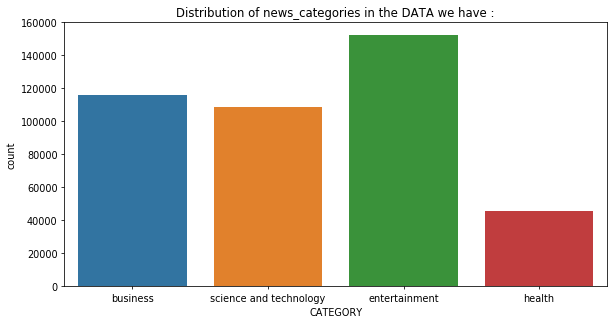

In [ ]:
plt.figure(figsize=(10, 5),dpi = 70)
plt.title("Distribution of news_categories in the DATA we have :")
ax = sns.countplot("CATEGORY",data=data)

In [ ]:
data['CATEGORY'].value_counts()

entertainment             152469
business                  115967
science and technology    108344
health                     45639
Name: CATEGORY, dtype: int64

 <font color='purple'>**Dropping all fetures other than Title(headline). Because as we discussed earlier This project is specifically focused on "Bert".And Bert Only takes Text Data.**</font>

In [ ]:
data = data[["TITLE","CATEGORY"]]
data.head(2)

,TITLE,CATEGORY
0,"Fed official says weak data caused by weather,...",business
1,Fed's Charles Plosser sees high bar for change...,business


<font color='purple'>**Printing Some Sample Points From Each Class.**</font>

In [ ]:
entertainment_category_points = data[data["CATEGORY"] == "entertainment"]
print("We have ",len(entertainment_category_points),"points in entertainment_category_points")
for i in range(5):
    index_of_random_point = random.randint(0, len(entertainment_category_points)-1)
    print("-"*60)
    print("HEADLINE  is :",entertainment_category_points.iloc[index_of_random_point]["TITLE"])
    print("Category in which headline bellongs to :",
          str(entertainment_category_points.iloc[index_of_random_point]["CATEGORY"]),"\n")

We have  152469 points in entertainment_category_points
------------------------------------------------------------
HEADLINE  is : Joss Whedon slays Hollywood studios, releases new film online
Category in which headline bellongs to : entertainment 

------------------------------------------------------------
HEADLINE  is : Mata shows why he should be Player of the Year ahead of Gerrard with his taste  ...
Category in which headline bellongs to : entertainment 

------------------------------------------------------------
HEADLINE  is : 'Star Wars: Episode VII' Is Already Filming, Reveals Disney's Alan Horn (VIDEO)
Category in which headline bellongs to : entertainment 

------------------------------------------------------------
HEADLINE  is : Jeezy Arrested, Jailed On Gun Possession Charge
Category in which headline bellongs to : entertainment 

------------------------------------------------------------
HEADLINE  is : Gary Oldman eloquently apologizes for being an 'a-hole' in his

In [ ]:
business_category_points = data[data["CATEGORY"] == "business"]
print("We have ",len(business_category_points),"points in business_category_points")
print("Some Random Points from Business Category :")
for i in range(5):
    index_of_random_point = random.randint(0, len(business_category_points)-1)
    print("-"*60)
    print("HEADLINE  is :",business_category_points.iloc[index_of_random_point]["TITLE"])
    print("Category in which headline bellongs to :",
          str(business_category_points.iloc[index_of_random_point]["CATEGORY"]),"\n")

We have  115967 points in business_category_points
Some Random Points from Business Category :
------------------------------------------------------------
HEADLINE  is : Burger King introduces gay Whopper
Category in which headline bellongs to : business 

------------------------------------------------------------
HEADLINE  is : US consumer confidence improves in March
Category in which headline bellongs to : business 

------------------------------------------------------------
HEADLINE  is : Body Slam! Wrestling's WWE Shares Down 43%
Category in which headline bellongs to : business 

------------------------------------------------------------
HEADLINE  is : Berlusconi denies children seeking EU seats
Category in which headline bellongs to : business 

------------------------------------------------------------
HEADLINE  is : Asia stocks rise on earnings, await US growth data
Category in which headline bellongs to : business 



In [ ]:
science_and_technology_category_points = data[data["CATEGORY"] == "science and technology"]
print("We have ",len(science_and_technology_category_points),"points in science_and_technology_category_points")
for i in range(5):
    index_of_random_point = random.randint(0, len(science_and_technology_category_points)-1)
    print("-"*60)
    print("HEADLINE  is :",science_and_technology_category_points.iloc[index_of_random_point]["TITLE"])
    print("Category in which headline bellongs to :",
          str(science_and_technology_category_points.iloc[index_of_random_point]["CATEGORY"]),"\n")

We have  108344 points in science_and_technology_category_points
------------------------------------------------------------
HEADLINE  is : 2015 Corvette Z06 Convertible gives car lovers a spring peek
Category in which headline bellongs to : science and technology 

------------------------------------------------------------
HEADLINE  is : Samsung Galaxy S5 Zoom Specs Leaked
Category in which headline bellongs to : science and technology 

------------------------------------------------------------
HEADLINE  is : Ancient Spiders Originally Had 2 Sets Of Eyes
Category in which headline bellongs to : science and technology 

------------------------------------------------------------
HEADLINE  is : HTC to Build the 2014 Nexus Tablet, Here are Potential Specs and Features
Category in which headline bellongs to : science and technology 

------------------------------------------------------------
HEADLINE  is : Project Morpheus vs. Oculus Rift: The Coming VR War Will Be Great For The 

In [ ]:
health_category_points = data[data["CATEGORY"] == "health"]
print("We have ",len(health_category_points),"points in health_category_points")
for i in range(5):
    index_of_random_point = random.randint(0, len(health_category_points)-1)
    print("-"*60)
    print("HEADLINE  is :",health_category_points.iloc[index_of_random_point]["TITLE"])
    print("Category in which headline bellongs to :",
          str(health_category_points.iloc[index_of_random_point]["CATEGORY"]),"\n")

We have  45639 points in health_category_points
------------------------------------------------------------
HEADLINE  is : Salt, obesity deadly combination: Age young cells prematurely
Category in which headline bellongs to : health 

------------------------------------------------------------
HEADLINE  is : Oakland Tribune editorial: Scary miscues at the CDC must be fixed quickly
Category in which headline bellongs to : health 

------------------------------------------------------------
HEADLINE  is : CDC warns of salmonella outbreak linked to chia powder, 21 ill in 12 states
Category in which headline bellongs to : health 

------------------------------------------------------------
HEADLINE  is : Brands aim to stop e-cigarette makers from using their trademarked names
Category in which headline bellongs to : health 

------------------------------------------------------------
HEADLINE  is : Children of same-sex couples are happier and healthier than their peers, study  ...
Cat

### <font color='green'>**The original Dataset is too big(4-Lac) points. So we are Creating A new small dataset such the distribution of categories we will partially hold on the new dataset.**</font>

<font color='purple'>** Selecting 10k random points from all health points for our new dataset.**</font>

In [ ]:
new_health_points = pd.DataFrame()
random_indexes_list = []
while (len(new_health_points)<10000):
    random_index = random.randint(0,len(health_category_points))
    if random_index not in random_indexes_list:
        random_indexes_list.append(random_index)
        new_health_points = new_health_points.append(health_category_points.iloc[random_index])
print("Now We have ",len(new_health_points),"points in new_health_points dataframe.")
print("-"*60)
new_health_points.head(3)

Now We have  10000 points in new_health_points dataframe.
------------------------------------------------------------


,CATEGORY,TITLE
95076,health,Spinal cord work offers unexpected hope
195273,health,Don the green to show support for children's m...
265966,health,"Reduce Tobacco Consumption, Save Lives"


<font color='purple'>** Selecting 30k random points from all science_and_technology_category_points points for our new dataset.**</font>

In [ ]:
new_science_and_technology_points = pd.DataFrame()
random_indexes_list = []
while (len(new_science_and_technology_points)<30000):
    random_index = random.randint(0,len(science_and_technology_category_points))
    if random_index not in random_indexes_list:
        random_indexes_list.append(random_index)
        new_science_and_technology_points = new_science_and_technology_points.append(science_and_technology_category_points.iloc[random_index])
print("Now we have ",len(new_science_and_technology_points),"points in new_science_and_technology_points dataframe.")
print("-"*60)
new_science_and_technology_points.head(3)

Now we have  30000 points in new_science_and_technology_points dataframe.
------------------------------------------------------------


,CATEGORY,TITLE
298223,science and technology,New bill would ban Internet 'fast lanes'
150032,science and technology,Comcast nears deal with Charter on $18-$20 bil...
142996,science and technology,Nike to introduce new color options for FuelBa...


<font color='purple'>** Selecting 30k random points from all business_category_points points for our new dataset.**</font>

In [ ]:
new_business_points = pd.DataFrame()
random_indexes_list = []
while (len(new_business_points)<30000):
    random_index = random.randint(0,len(business_category_points))
    if random_index not in random_indexes_list:
        random_indexes_list.append(random_index)
        new_business_points = new_business_points.append(business_category_points.iloc[random_index])
print("Now we have ",len(new_business_points),"points in new_business_points dataframe.")
print("-"*60)
new_business_points.head()

Now we have  30000 points in new_business_points dataframe.
------------------------------------------------------------


,CATEGORY,TITLE
38104,business,Enviros: Keep coal ash out of NC landfills
212635,business,JC Penney Turnaround Still A Ways Off
314969,business,NTSB faults pilots in last year's Asiana flight
83759,business,Nigeria Takes Over From South Africa As Contin...
144470,business,Will Gilead (GILD) Beat Q1 Earnings?


<font color='purple'>** Selecting 30k random points from all entertainment_category_points points for our new dataset.**</font>

In [ ]:
new_entertainment_points = pd.DataFrame()
random_indexes_list = []
while (len(new_entertainment_points)<30000):
    random_index = random.randint(0,len(entertainment_category_points)-1)
    if random_index not in random_indexes_list:
        random_indexes_list.append(random_index)
        new_entertainment_points = new_entertainment_points.append(entertainment_category_points.iloc[random_index])
print("Now we have ",len(new_entertainment_points),"points in new_entertainment_points dataframe.")
print("-"*60)
new_entertainment_points.head()

Now we have  30000 points in new_entertainment_points dataframe.
------------------------------------------------------------


,CATEGORY,TITLE
251238,entertainment,'X-Men' dominates holiday box office with $91 ...
18927,entertainment,Kate Winslet honoured with her own star on the...
320088,entertainment,Rob Kardashian - Rob Kardashian not speaking t...
261637,entertainment,'This Is Where I Leave You' Trailer Teases All...
209714,entertainment,"'Mad Men' season 7, episode 5 review: Don, Meg..."


<font color='purple'>**Combining all individual datasets to get a final dataset. Which will have 1-Lac points.**</font>

In [ ]:
final_news_headlines_dataset = pd.DataFrame()
print("Adding Health_category_points in our final dataframe...")
final_news_headlines_dataset = final_news_headlines_dataset.append(new_health_points)
print("After adding Health_category_points the size of our dataframe is :",len(final_news_headlines_dataset))

print("-"*60)
print("Adding new_science_and_technology_points in our final dataframe...")
final_news_headlines_dataset = final_news_headlines_dataset.append(new_science_and_technology_points)
print("After adding new_science_and_technology_points the size of our dataframe is :",len(final_news_headlines_dataset))

print("-"*60)
print("Adding new_business_points in our final dataframe...")
final_news_headlines_dataset = final_news_headlines_dataset.append(new_business_points)
print("After adding new_business_points the size of our dataframe is :",len(final_news_headlines_dataset))

print("-"*60)
print("Adding new_entertainment_points in our final dataframe...")
final_news_headlines_dataset = final_news_headlines_dataset.append(new_entertainment_points)
print("After adding new_entertainment_points the size of our dataframe is :",len(final_news_headlines_dataset))

Adding Health_category_points in our final dataframe...
After adding Health_category_points the size of our dataframe is : 10000
------------------------------------------------------------
Adding new_science_and_technology_points in our final dataframe...
After adding new_science_and_technology_points the size of our dataframe is : 40000
------------------------------------------------------------
Adding new_business_points in our final dataframe...
After adding new_business_points the size of our dataframe is : 70000
------------------------------------------------------------
Adding new_entertainment_points in our final dataframe...
After adding new_entertainment_points the size of our dataframe is : 100000


<font color='purple'>** Shuffling the dataset so ordering of categories will be gone.**</font>

In [ ]:
final_news_headlines_dataset_shuffeled = shuffle(final_news_headlines_dataset)
final_news_headlines_dataset_shuffeled.head()

,CATEGORY,TITLE
340022,science and technology,Facebook researcher apologizes for emotional r...
326377,business,Philip Morris Heats Things Up With Real Tobacc...
134552,entertainment,Aereo's new site explains its side of the Supr...
162232,entertainment,Rivers refuses to apologize to Cleveland women...
384769,science and technology,Do you remember when America landed men on the...


<font color='purple'>** Saving the new Dataset in memory. So we Do not have to perform the whole process again and again.**</font>

In [ ]:
final_news_headlines_dataset_shuffeled.to_csv("news_headline_dataset.csv",index = False)

<font color='purple'>** Reading new Dataset.**</font>

In [18]:
news_data = pd.read_csv("/content/drive/MyDrive/1. My_folder/2. AI Projects./3. News_categories_prediction/news_headline_dataset.csv")
news_data.head()

,CATEGORY,TITLE
0,entertainment,Kate Middleton's red dress sets new trend
1,health,Mystery Illness Kills 23 in Guinea
2,health,"Fertility bosses say 'three-parent IVF' is ""no..."
3,health,(click the phrases to see a list)
4,science and technology,YouTube rumoured to be working on a child-frie...


### <font color='green'>**Some Data Analysis of the new Dataset. **</font>

In [19]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   CATEGORY  100000 non-null  object
 1   TITLE     100000 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


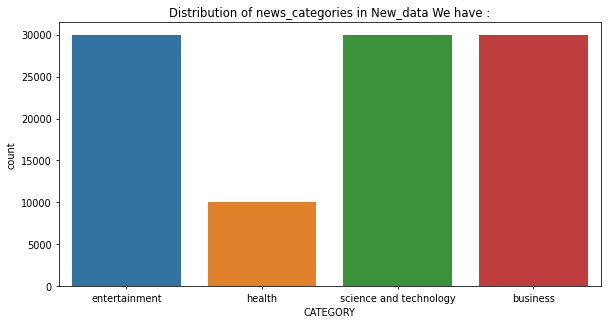

In [20]:
plt.figure(figsize=(10, 5),dpi = 70)
plt.title("Distribution of news_categories in New_data We have :")
ax = sns.countplot("CATEGORY",data=news_data)

In [ ]:
entertainment_category_points = news_data[news_data["CATEGORY"] == "entertainment"]
print("We have",len(entertainment_category_points),"points Which Belongs to Entertainment Category.")
print("\nSome Sample points are :")
for index in range(5):
    random_index = random.randint(0,len(entertainment_category_points)-1)
    print("-"*60)
    print(entertainment_category_points.iloc[random_index]["TITLE"])

We have 30000 points Which Belongs to Entertainment Category.

Some Sample points are :
------------------------------------------------------------
'Game of Thrones' Shocker: Is It Wrong That I Really Enjoyed That?
------------------------------------------------------------
Weisz to join De Niro in Idol's Eye
------------------------------------------------------------
Cameron Diaz and Jason Segel: 'It's Hard to Embarrass Us.'
------------------------------------------------------------
What a Ladylike Look! Kate Middleton Steps Out in a Scarlet Frock
------------------------------------------------------------
OPINION: The true meaning of Mothering Sunday


In [ ]:
business_category_points = news_data[news_data["CATEGORY"] == "business"]
print("We have",len(business_category_points),"points Which Belongs to business Category.")
print("\nSome Sample points are :")
for index in range(5):
    random_index = random.randint(0,len(business_category_points)-1)
    print("-"*60)
    print(business_category_points.iloc[random_index]["TITLE"])

We have 30000 points Which Belongs to business Category.

Some Sample points are :
------------------------------------------------------------
Europe open: GE may purchase Alstom for 13bn dollars
------------------------------------------------------------
NY attorney general reports $298000 in income
------------------------------------------------------------
Malaysia Airlines faces overhaul
------------------------------------------------------------
Important lessons to take away from BNP Paribas' record settlement
------------------------------------------------------------
BlackBerry CEO plans lawsuit in effort to stomp out product leaks


In [ ]:
science_and_technology_category_points = news_data[news_data["CATEGORY"] == "science and technology"]
print("We have",len(science_and_technology_category_points),"points Which Belongs to science_and_technology Category.")
print("\nSome Sample points are :")
for index in range(5):
    random_index = random.randint(0,len(science_and_technology_category_points)-1)
    print("-"*60)
    print(science_and_technology_category_points.iloc[random_index]["TITLE"])

We have 30000 points Which Belongs to science_and_technology Category.

Some Sample points are :
------------------------------------------------------------
New MacBook Airs to Feature Minor Processor Update
------------------------------------------------------------
Carriers Begin Pricing Samsung Galaxy S5
------------------------------------------------------------
​YouTube's 'Trusted Flagger' users have an inside track to get videos removed
------------------------------------------------------------
Watch Dogs
------------------------------------------------------------
Microsoft lays Android Nokia X to rest


In [ ]:
health_category_points = news_data[news_data["CATEGORY"] == "health"]
print("We have",len(health_category_points),"points Which Belongs to health Category.")
print("\nSome Sample points are :")
for index in range(5):
    random_index = random.randint(0,len(health_category_points)-1)
    print("-"*60)
    print(health_category_points.iloc[random_index]["TITLE"])

We have 10000 points Which Belongs to health Category.

Some Sample points are :
------------------------------------------------------------
WHO raises concerns over Ebola outbreak
------------------------------------------------------------
Obama picks a new face of health care
------------------------------------------------------------
Insulin-making cells created by Dolly-cloning method
------------------------------------------------------------
Blood test to accurately detect cancers and how advanced disease is
------------------------------------------------------------
2 cases of mosquito virus contracted in US


<font color='purple'>**Printing Percentiles Values of length of headlines. So we get an idea of how lengthy our headlines are.**</font>

50th percentile Value of all lengths of headline is : 9.0
90th percentile Value of all lengths of headline is : 13.0
95th percentile Value of all lengths of headline is : 15.0
99th percentile Value of all lengths of headline is : 16.0
99.9th percentile Value of all lengths of headline is : 18.0
99.99th percentile Value of all lengths of headline is : 20.0
100th percentile Value of all lengths of headline is : 777.0 

------------------------------------------------------------
Now Let's look at the PDF of headlines length :



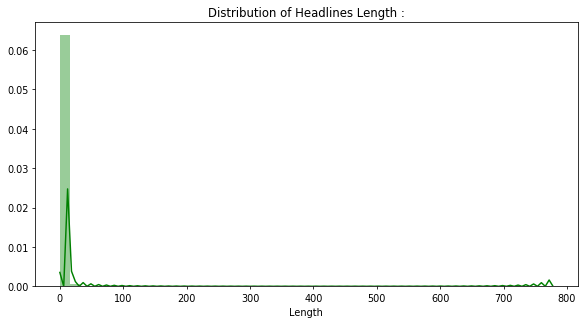

In [ ]:
lengths_of_headlines = [len(list(headline.split(" "))) for headline in news_data.TITLE.values ]

print("50th percentile Value of all lengths of headline is :",np.percentile(lengths_of_headlines, 50))
print("90th percentile Value of all lengths of headline is :",np.percentile(lengths_of_headlines, 90))
print("95th percentile Value of all lengths of headline is :",np.percentile(lengths_of_headlines, 95))
print("99th percentile Value of all lengths of headline is :",np.percentile(lengths_of_headlines, 99))
print("99.9th percentile Value of all lengths of headline is :",np.percentile(lengths_of_headlines, 99.9))
print("99.99th percentile Value of all lengths of headline is :",np.percentile(lengths_of_headlines, 99.99))
print("100th percentile Value of all lengths of headline is :",np.percentile(lengths_of_headlines, 100),"\n")

print("-"*60)
print("Now Let's look at the PDF of headlines length :\n")
plt.figure(figsize=(10, 5),dpi = 70)
plt.title("Distribution of Headlines Length :")
plt.xlabel("Length")
ax = sns.distplot( lengths_of_headlines,color ='green')

In [21]:
news_headlines = news_data["TITLE"]
news_categories = news_data["CATEGORY"]
train_headlines,test_headlines,train_categories,test_categories = train_test_split(news_headlines,
                                             news_categories, test_size=0.1, random_state=20,stratify =news_categories )
print("We have",len(train_headlines),"train_headlines and",len(train_categories),"train_categories for them.")
print("-"*70)
print("We have",len(test_headlines),"test_headlines and",len(test_categories),"test_categories for them.")

We have 90000 train_headlines and 90000 train_categories for them.
----------------------------------------------------------------------
We have 10000 test_headlines and 10000 test_categories for them.


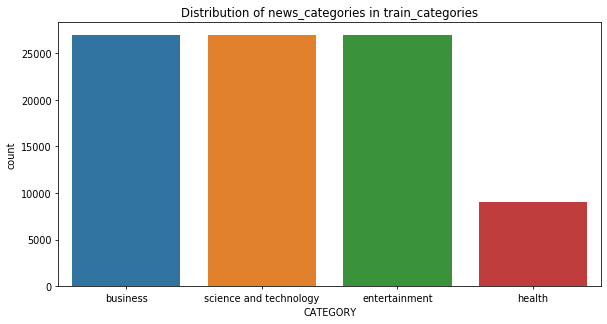

In [ ]:
plt.figure(figsize=(10, 5),dpi = 70)
plt.title("Distribution of news_categories in train_categories")
ax = sns.countplot(train_categories,data=pd.DataFrame(train_categories))

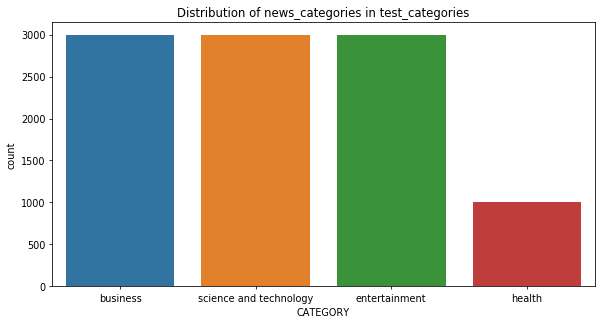

In [ ]:
plt.figure(figsize=(10, 5),dpi = 70)
plt.title("Distribution of news_categories in test_categories")
ax = sns.countplot(test_categories,data=pd.DataFrame(test_categories))

<font color='purple'>** Creating Worldcloud of the headlines we have. **</font>

In [ ]:
! pip install wordcloud

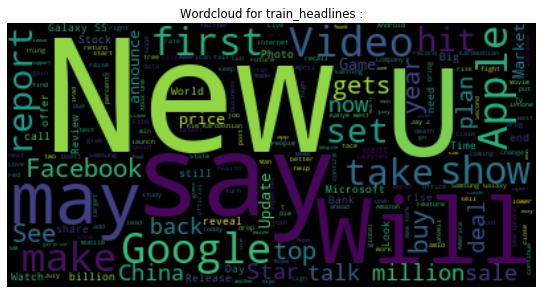

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

final_text = ''
for headline in train_headlines:
    final_text += headline
# Create and generate a word cloud image:
wordcloud = wordcloud = WordCloud().generate(final_text)
# Display the generated image:
plt.figure(figsize=(10, 5),dpi = 70)
plt.title("Wordcloud for train_headlines :")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

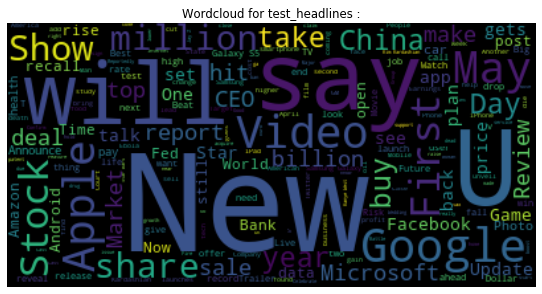

In [ ]:
final_text = ''
for headline in test_headlines:
    final_text += headline
# Create and generate a word cloud image:
wordcloud = wordcloud = WordCloud().generate(final_text)
# Display the generated image:
plt.figure(figsize=(10, 5),dpi = 70)
plt.title("Wordcloud for test_headlines :")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### <font color='green'>** Defining Bert Model **</font>

In [22]:
## Loading the Pretrained Model from tensorflow HUB
tf.keras.backend.clear_session()

# maximum length of a seq in the data we have, for now i am making it as 500. You can change this
max_seq_length = 20

#BERT takes 3 inputs

#this is input words. Sequence of words represented as integers
input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_word_ids")

#mask vector if you are padding anything
input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_mask")

#segment vectors. If you are giving only one sentence for the classification, total seg vector is 0. 
#If you are giving two sentenced with [sep] token separated, first seq segment vectors are zeros and 
#second seq segment vector are 1's
segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="segment_ids")

#bert layer 
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1", trainable=False)
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])

#Bert model
#We are using only pooled output not sequence out. 
#If you want to know about those, please read https://www.kaggle.com/questions-and-answers/86510
bert_model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=pooled_output)

bert_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 20)]         0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 20)]         0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 20)]         0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]             

In [24]:
#getting Vocab file
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()

In [25]:
! pip install bert-for-tf2

     |████████████████████████████████| 41 kB 183 kB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30536 sha256=e806b8946cc5ffda4887dd27b0c764ab345187c4f40db4823bc0d09c383d208b
  Stored in directory: /root/.cache/pip/wheels/47/b6/e5/8c76ec779f54bc5c2f1b57d2200bb9c77616da83873e8acb53
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19471 sha256=6c1e7e1bf4533781a63d3b80d08ba204c91e233d633b6867d64eb2657b6d5d0e
  Stored in directory: /root/.cache/pip/wheels/0e/fc/d2/a44fff33af0f233d7def6e7de413006d57c10e10ad736fe8f5
  Created wheel for py-params: filename=py_params-0.10.2-py3-none-any.whl size=7910 sha256=ada472f295c4c3c0124df12eac9fa78286b1098cd94b3d75266e5adee5a4e0a0
  Stored in directory: /root/.cache/pip/wheels/e1/11/67/33cc51bbee127cb8fb2ba549cd29109b2f22da43ddf9969716
Successfully built bert-for-tf2 params-flow py-params


<font color='purple'>** Creating Tokenizer **</font>

In [26]:
#from bert import tokenization
#from bert import tokenization
from bert import bert_tokenization
tokenizer = bert_tokenization.FullTokenizer(vocab_file, do_lower_case )

In [27]:
train_headlines_tokens = []
for article in tqdm(train_headlines.values):
    tokens_of_article = tokenizer.tokenize(article)
    tokens_of_article = tokens_of_article[0:(max_seq_length-2)]
    tokens_of_article = ['[CLS]',*tokens_of_article,'[SEP]']
    tokens_of_article = list(tokens_of_article)
    if len(tokens_of_article) < max_seq_length:
        no_of_tokens_remains = max_seq_length - len(tokens_of_article)
        for i in range(no_of_tokens_remains):
            tokens_of_article.append("[PAD]")
    padded_token_of_article = np.array(tokens_of_article)
    encoded_tokens_of_article = tokenizer.convert_tokens_to_ids(padded_token_of_article)
    train_headlines_tokens.append(encoded_tokens_of_article)

train_headlines_tokens = np.array(train_headlines_tokens)

print("Shape of train_headlines_tokens is :",train_headlines_tokens.shape)
print("-"*60)
print("One sample token is :\n",train_headlines_tokens[1])


Shape of train_headlines_tokens is : (90000, 20)
------------------------------------------------------------
One sample token is :
 [  101  8112  1024 28051  8957  1000  1037  2210 12459  1000   102     0
     0     0     0     0     0     0     0     0]


<font color='purple'>** Adding Special Tokens, Truncating, Padding , Canvering Tokens to Ids **</font>

In [28]:
test_headlines_tokens = []
for article in tqdm(test_headlines.values):
    tokens_of_article = tokenizer.tokenize(article)
    tokens_of_article = tokens_of_article[0:(max_seq_length-2)]
    tokens_of_article = ['[CLS]',*tokens_of_article,'[SEP]']
    tokens_of_article = list(tokens_of_article)
    if len(tokens_of_article) < max_seq_length:
        no_of_tokens_remains = max_seq_length - len(tokens_of_article)
        for i in range(no_of_tokens_remains):
            tokens_of_article.append("[PAD]")
    padded_token_of_article = np.array(tokens_of_article)
    encoded_tokens_of_article = tokenizer.convert_tokens_to_ids(padded_token_of_article)
    test_headlines_tokens.append(encoded_tokens_of_article)

test_headlines_tokens = np.array(test_headlines_tokens)

print("Shape of test_headlines_tokens is :",test_headlines_tokens.shape)
print("-"*60)
print("One sample token is :\n",test_headlines_tokens[1])


Shape of test_headlines_tokens is : (10000, 20)
------------------------------------------------------------
One sample token is :
 [  101 21144  2050 11032  6706  1010  2021  2025  2302 10831   102     0
     0     0     0     0     0     0     0     0]


<font color='purple'>** Creating Mask-Vectors**</font>

In [29]:
# Based on padding, create the mask for Train and Test ( 1 for real token, 0 for '[PAD]'), 
# it will also same shape as input tokens (None, 55) save those in X_train_mask, X_test_mask
train_headlines_mask = []
for tokens in tqdm(train_headlines_tokens):
    nonzero_elements = np.count_nonzero(list(tokens))
    mask_array = [1]*nonzero_elements+[0]*(max_seq_length-nonzero_elements)
    mask_array = np.array(mask_array)
    train_headlines_mask.append(mask_array)

train_headlines_mask = np.array(train_headlines_mask)
print("Shape of train_headlines_mask is :",train_headlines_mask.shape)
print("-"*60)
print("One sample mask array is :\n",train_headlines_mask[1])


Shape of train_headlines_mask is : (90000, 20)
------------------------------------------------------------
One sample mask array is :
 [1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]


In [30]:
test_headlines_mask = []
for tokens in tqdm(test_headlines_tokens):
    nonzero_elements = np.count_nonzero(list(tokens))
    mask_array = [1]*nonzero_elements+[0]*(max_seq_length-nonzero_elements)
    mask_array = np.array(mask_array)
    test_headlines_mask.append(mask_array)

test_headlines_mask = np.array(test_headlines_mask)
print("Shape of test_headlines_mask is :",test_headlines_mask.shape)
print("-"*60)
print("One sample mask array is :\n",test_headlines_mask[1])


Shape of test_headlines_mask is : (10000, 20)
------------------------------------------------------------
One sample mask array is :
 [1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]


<font color='purple'>**Creating Segment-Vectors**</font>

In [31]:
# Create a segment input for train and test. We are using only one sentence so all zeros. This shape will also (None, 55)
train_headlines_segment = []
for i in tqdm(range(len(train_headlines_tokens))):
    segment_array = [0]*max_seq_length
    segment_array = np.array(segment_array)
    train_headlines_segment.append(segment_array)

train_headlines_segment = np.array(train_headlines_segment)
print("Shape of train_headlines_segment is :",train_headlines_segment.shape)
print("-"*60)
print("One sample segment array is :\n",train_headlines_segment[1])


Shape of train_headlines_segment is : (90000, 20)
------------------------------------------------------------
One sample segment array is :
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [32]:
# Create a segment input for train and test. We are using only one sentence so all zeros. This shape will also (None, 55)
test_headlines_segment = []
for i in tqdm(range(len(test_headlines_tokens))):
    segment_array = [0]*max_seq_length
    segment_array = np.array(segment_array)
    test_headlines_segment.append(segment_array)

test_headlines_segment = np.array(test_headlines_segment)
print("Shape of test_headlines_segment is :",test_headlines_segment.shape)
print("-"*60)
print("One sample segment array is :\n",test_headlines_segment[1])


Shape of test_headlines_segment is : (10000, 20)
------------------------------------------------------------
One sample segment array is :
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


<font color='purple'>** Storing all in pickle files and saving in memory **</font>

In [33]:
##save all your results to disk so that, no need to run all again. 
pickle.dump((train_headlines, train_headlines_tokens, train_headlines_mask, train_headlines_segment, train_categories),
                                                  open('train_data.pkl','wb'))
pickle.dump((test_headlines, test_headlines_tokens, test_headlines_mask, test_headlines_segment, test_categories),
                                                  open('test_data.pkl','wb'))

<font color='purple'>** Loading our data from pickle files **</font>

In [34]:
train_headlines, train_headlines_tokens, train_headlines_mask, train_headlines_segment, train_categories = pickle.load(open("train_data.pkl", 'rb'))
test_headlines, test_headlines_tokens, test_headlines_mask, test_headlines_segment, test_categories = pickle.load(open("test_data.pkl", 'rb'))

<font color='purple'>** Checking shapes of input and output of Bert Models **</font>

In [35]:
print("Shape of bert model input is :\n",bert_model.input)

Shape of bert model input is :
 [<KerasTensor: shape=(None, 20) dtype=int32 (created by layer 'input_word_ids')>, <KerasTensor: shape=(None, 20) dtype=int32 (created by layer 'input_mask')>, <KerasTensor: shape=(None, 20) dtype=int32 (created by layer 'segment_ids')>]


In [36]:
print("Shape of bert model input is :\n",bert_model.output)

Shape of bert model input is :
 KerasTensor(type_spec=TensorSpec(shape=(None, 768), dtype=tf.float32, name=None), name='keras_layer/StatefulPartitionedCall:0', description="created by layer 'keras_layer'")


<font color='purple'>** Giving my all data to Bert model and getting 768-Dim featurization for each point. **</font>

In [38]:
# get the train output, BERT model will give one output so save in
bert_model_train_headlines=bert_model.predict([train_headlines_tokens, train_headlines_mask, train_headlines_segment])
print("Output's shape of Bert model We obtained after giving train_headlines is :",bert_model_train_headlines.shape)

Output's shape of Bert model We obtained after giving train_headlines is : (90000, 768)


In [40]:
# get the train output, BERT model will give one output so save in
bert_model_test_headlines=bert_model.predict([test_headlines_tokens, test_headlines_mask, test_headlines_segment])
print("Output's shape of Bert model We obtained after giving test_headlines is :",bert_model_test_headlines.shape)

Output's shape of Bert model We obtained after giving test_headlines is : (10000, 768)


<font color='purple'>** Mapping my categories to numerical Values **</font>

In [41]:
train_headlines_categories = pd.Series(train_categories).map({"health":0,"business":1,"entertainment":2,"science and technology":3})
test_headlines_categories = pd.Series(test_categories).map({"health":0,"business":1,"entertainment":2,"science and technology":3})

<font color='purple'>** Saving all featirization we get from Bert to memory **</font>

In [42]:
pickle.dump((bert_model_train_headlines, bert_model_test_headlines,
                        train_headlines_categories,test_headlines_categories),open('news_headlines_bert_output.pkl','wb'))

In [60]:
!cp "/content/news_headlines_bert_output.pkl" "/content/drive/MyDrive/1. My_folder/2. AI Projects./3. News_categories_prediction"

<font color='purple'>** Loading all my Bert featurization from memory **</font>

In [61]:
bert_model_train_headlines, bert_model_test_headlines,train_headlines_categories,test_headlines_categories = pickle.load(open('news_headlines_bert_output.pkl', 'rb'))

<font color='purple'>** Defining my Sequential Neural Network **</font>

In [62]:
model = None
model = Sequential()
model.add(Dense(512, activation = "relu" , input_shape = bert_model_train_headlines[0].shape))
model.add(Dense(512, activation = "relu" ))
model.add(Dense(128, activation = "relu" ))
model.add(Dense(64 , activation = "relu" ))
model.add(Dense(32 , activation = "relu" ))
model.add(Dense(16 , activation = "relu" ))
model.add(Dense(4 , activation = "softmax"))
# Summary of model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               393728    
_________________________________________________________________
dense_22 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_23 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_24 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_25 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_26 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_27 (Dense)             (None, 4)                

<font color='purple'>** Compiling my Neural Network **</font>

In [63]:
#optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy',metrics=['accuracy'])

<font color='purple'>** Converting my categories in a Numpy array **</font>

In [64]:
train_headlines_categories = np.array(train_headlines_categories)
test_headlines_categories = np.array(test_headlines_categories)

<font color='purple'>** Defining TensorBoard CallBack **</font>

In [65]:
# for Tensorboard
import os
import datetime
logdir = os.path.join("model_training_log_file__", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)

<font color='purple'>** Starting Traing of Model **</font>

In [66]:
model_history = model.fit(bert_model_train_headlines , train_headlines_categories , batch_size=16, epochs=5,
                            validation_data=(bert_model_test_headlines,test_headlines_categories),
                                            callbacks = [tensorboard_callback])

Epoch 1/5
5625/5625 [==============================] - 14s 2ms/step - loss: 0.7637 - accuracy: 0.6917 - val_loss: 0.6406 - val_accuracy: 0.7692
Epoch 2/5
5625/5625 [==============================] - 13s 2ms/step - loss: 0.6102 - accuracy: 0.7686 - val_loss: 0.6410 - val_accuracy: 0.7543
Epoch 3/5
5625/5625 [==============================] - 15s 3ms/step - loss: 0.5764 - accuracy: 0.7830 - val_loss: 0.5380 - val_accuracy: 0.7984
Epoch 4/5
5625/5625 [==============================] - 15s 3ms/step - loss: 0.5616 - accuracy: 0.7884 - val_loss: 0.5668 - val_accuracy: 0.7921
Epoch 5/5
5625/5625 [==============================] - 14s 2ms/step - loss: 0.5451 - accuracy: 0.7960 - val_loss: 0.5104 - val_accuracy: 0.8109


<font color='purple'>** Loading Tensorboard Log Files **</font>

In [67]:
%load_ext tensorboard

In [69]:
%tensorboard --logdir model_training_log_file__

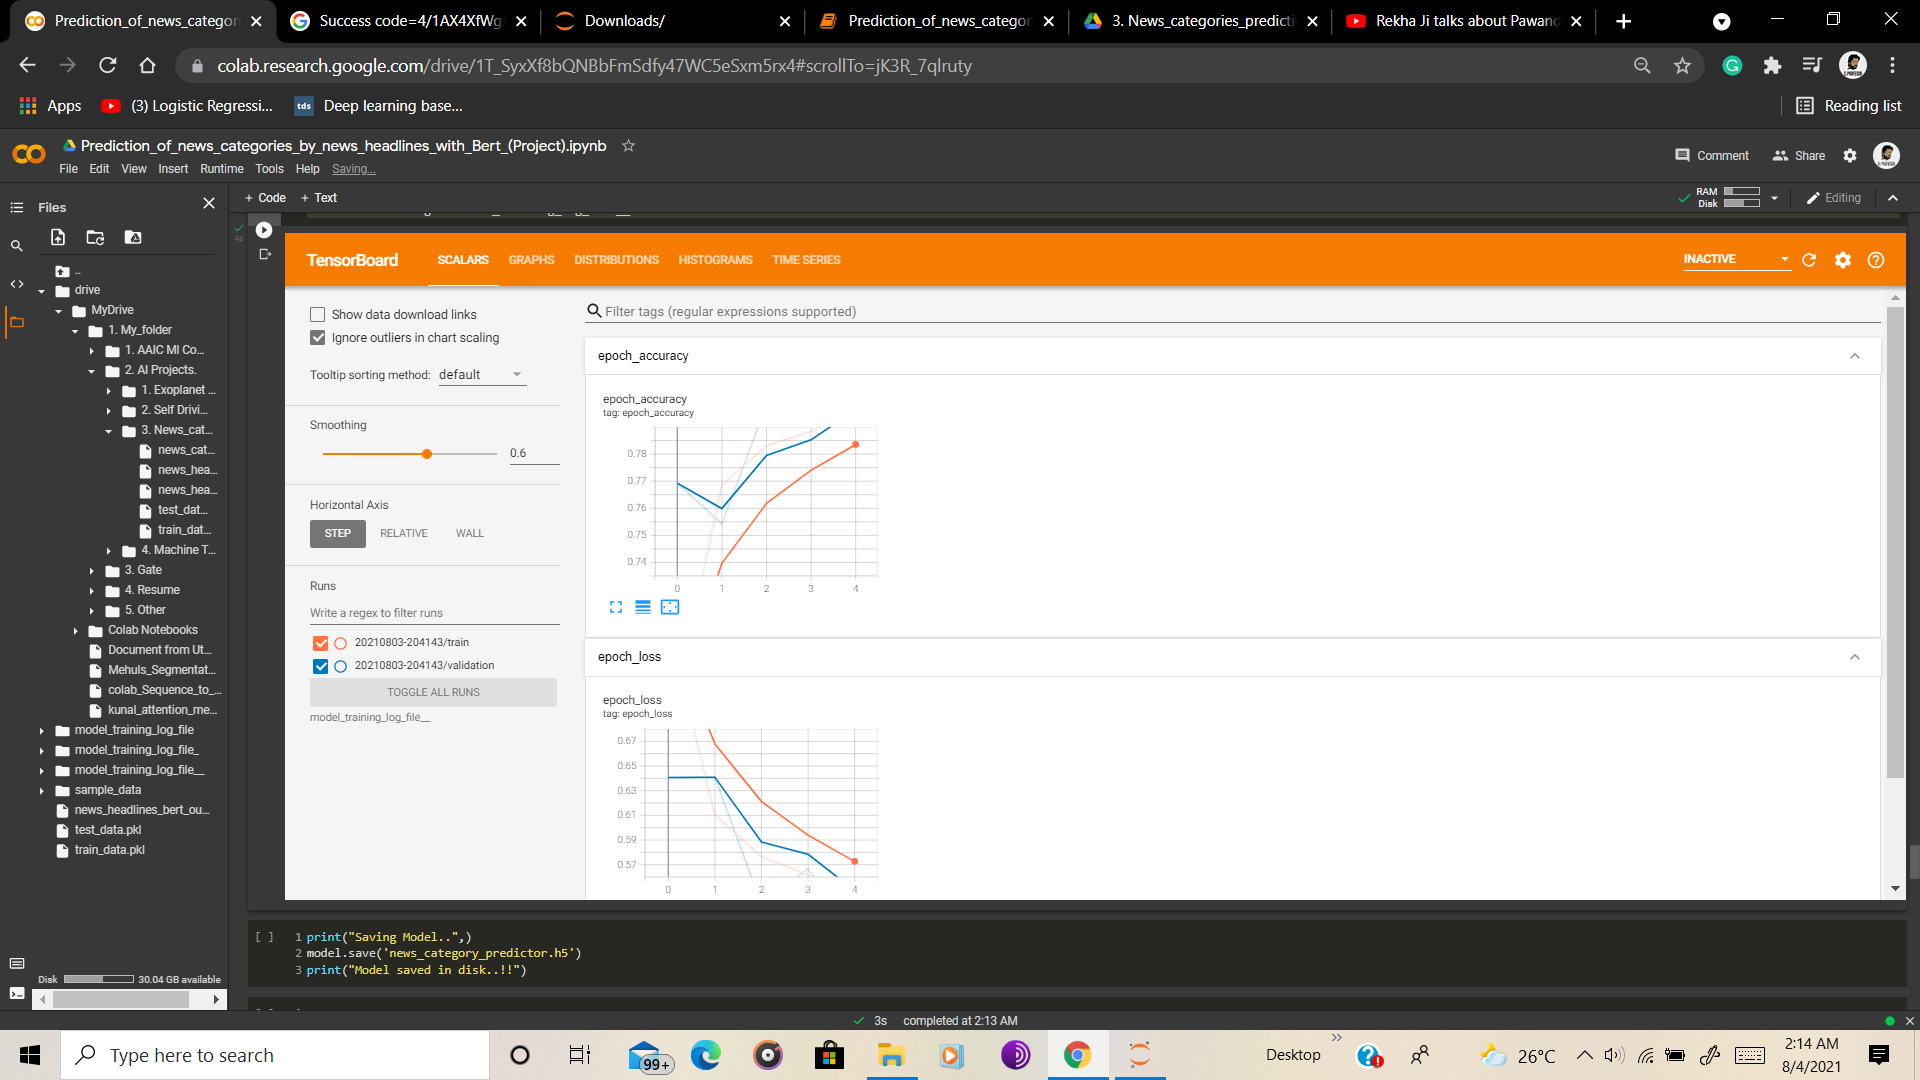

<font color='purple'>** Saving my model in disk for future**</font>

In [70]:
print("Saving Model..",)
model.save('news_category_predictor.h5')
print("Model saved in disk..!!")

Saving Model..
Model saved in disk..!!


In [71]:
! cp "/content/news_category_predictor.h5" "/content/drive/MyDrive/1. My_folder/2. AI Projects./3. News_categories_prediction"

### <font color='green'>** Combing whole data pipeline in just one function **</font>

In [72]:
def what_is_category_of_this_headline(headline):
    tokens_of_headline = tokenizer.tokenize(headline)
    max_seq_length = 20
    tokens_of_headline = tokens_of_headline[0:(max_seq_length-2)]
    tokens_of_headline = ['[CLS]',*tokens_of_headline,'[SEP]']
    tokens_of_headline = list(tokens_of_headline)
    if len(tokens_of_headline) < max_seq_length:
        no_of_tokens_remains = max_seq_length - len(tokens_of_headline)
        for i in range(no_of_tokens_remains):
            tokens_of_headline.append("[PAD]")
    padded_token_of_headline = np.array(tokens_of_headline)
    tokens_of_headline = np.array(tokenizer.convert_tokens_to_ids(padded_token_of_headline))
    tokens_of_headline = tokens_of_headline.reshape(1,-1)
    #print(tokens_of_headline)
    
    # Mask Array
    nonzero_elements = np.count_nonzero(list(tokens_of_headline))
    mask_array = [1]*nonzero_elements+[0]*(max_seq_length-nonzero_elements)
    mask_array_of_headline = np.array(mask_array)
    mask_array_of_headline = mask_array_of_headline.reshape(1,-1)
    # segment Array
    segment_array = [0]*max_seq_length
    segment_array_of_headline = np.array(segment_array)
    #print(segment_array_of_headline)
    segment_array_of_headline = segment_array_of_headline.reshape(1,-1)


    #print(tokens_of_headline.shape)
    #print(mask_array_of_headline.shape)
    #print(segment_array_of_headline.shape)


    
    # Giving to Bert
    bert_model_encoded_headline=bert_model.predict([tokens_of_headline, mask_array_of_headline, segment_array_of_headline])
    #print(bert_model_encoded_headline.shape)
    #bert_model_encoded_headline = bert_model_encoded_headline.reshape(-1,1)
    #print(bert_model_encoded_headline.shape)
    
    # Load_model
    model = load_model("/content/drive/MyDrive/1. My_folder/2. AI Projects./3. News_categories_prediction/news_category_predictor.h5")
    
    # Predicting 
    probilities = model.predict(bert_model_encoded_headline)
    #print(probilities)
    label = np.argmax(probilities)
    if label == 0 :
        return """This Headline belongs to 'Health' Category."""
    if label == 1 :
        return """This Headline belongs to 'Business' Category."""
    if label == 2 :
        return """This Headline belongs to 'Entertainment' Category."""
    if label == 3 :
        return """This Headline belongs to 'Science_&_Technology' Category."""

### <font color='green'>** Predicting Some Categories of news headlines by our Model to check  **</font>

In [110]:
import time

data = pd.read_csv(r"/content/drive/MyDrive/1. My_folder/2. AI Projects./3. News_categories_prediction/news_headline_dataset.csv")
Headline  = data.iloc[100]["TITLE"]
original_category = data.iloc[100]["CATEGORY"]
start = time.time()
what_model_predicted = what_is_category_of_this_headline(Headline)
end = time.time()
print("Prediction Done in",start-end,"seconds")
print("-"*50)
print("Headline is :",Headline,"--")
print("Originally this Headline belongs to :",original_category)
print("Model Says :",what_model_predicted)

Prediction Done in -0.2653622627258301 seconds
--------------------------------------------------
Headline is : Stephen Colbert's 'cub' bears down on new 'Late Show' host --
Originally this Headline belongs to : entertainment
Model Says : This Headline belongs to 'Entertainment' Category.


In [111]:
Headline  = data.iloc[1000]["TITLE"]
original_category = data.iloc[1000]["CATEGORY"]
start = time.time()
what_model_predicted = what_is_category_of_this_headline(Headline)
end = time.time()
print("Prediction Done in",start-end,"seconds")
print("-"*50)
print("Headline is :",Headline,"--")
print("Originally this Headline belongs to :",original_category)
print("Model Says :",what_model_predicted)

Prediction Done in -0.24919486045837402 seconds
--------------------------------------------------
Headline is : Former iPhone User Suing Apple Over Unreceived Texts After Switching To  ... --
Originally this Headline belongs to : science and technology
Model Says : This Headline belongs to 'Science_&_Technology' Category.


In [112]:
Headline  = data.iloc[10000]["TITLE"]
original_category = data.iloc[10000]["CATEGORY"]
start = time.time()
what_model_predicted = what_is_category_of_this_headline(Headline)
end = time.time()
print("Prediction Done in",start-end,"seconds")
print("-"*50)
print("Headline is :",Headline,"--")
print("Originally this Headline belongs to :",original_category)
print("Model Says :",what_model_predicted)

Prediction Done in -0.2697582244873047 seconds
--------------------------------------------------
Headline is : Rhody Roundup: Johnny Depp begins work as Whitey Bulger --
Originally this Headline belongs to : entertainment
Model Says : This Headline belongs to 'Entertainment' Category.


In [115]:
Headline  = data.iloc[888]["TITLE"]
original_category = data.iloc[888]["CATEGORY"]
start = time.time()
what_model_predicted = what_is_category_of_this_headline(Headline)
end = time.time()
print("Prediction Done in",start-end,"seconds")
print("-"*50)
print("Headline is :",Headline,"--")
print("Originally this Headline belongs to :",original_category)
print("Model Says :",what_model_predicted)

Prediction Done in -0.26825785636901855 seconds
--------------------------------------------------
Headline is : After Stanford Divests From Coal, Activists' Hopes Turn To Harvard --
Originally this Headline belongs to : business
Model Says : This Headline belongs to 'Business' Category.


### <font color='green'>**Thank You..!! :) **</font>